In [1]:
# From https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

# data: https://www.kaggle.com/benhamner/nips-papers/downloads/nips-papers.zip/2

In [2]:
import pandas as pd

df = pd.read_csv('./nips-papers/papers.csv')

In [3]:
df = df[df['abstract'] != 'Abstract Missing']

In [4]:
df['abstract1'] = df['title'] + ' ' + df['abstract']

In [5]:
df[['id', 'year', 'abstract1']].to_csv('paper2.txt', sep='\t', index=None)

In [6]:
dataset = pd.read_csv('paper2.txt', delimiter='\t')

In [7]:
dataset.head()

,id,year,abstract1
0,1861,2000,Algorithms for Non-negative Matrix Factorizati...
1,1975,2001,Characterizing Neural Gain Control using Spike...
2,3163,2007,Competition Adds Complexity It is known that d...
3,3164,2007,Efficient Principled Learning of Thin Junction...
4,3167,2007,Regularized Boost for Semi-Supervised Learning...


In [8]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['abstract1'].apply(lambda x: len(str(x).split(" ")))
dataset[['abstract1','word_count']].head()

,abstract1,word_count
0,Algorithms for Non-negative Matrix Factorizati...,112
1,Characterizing Neural Gain Control using Spike...,88
2,Competition Adds Complexity It is known that d...,70
3,Efficient Principled Learning of Thin Junction...,150
4,Regularized Boost for Semi-Supervised Learning...,124


In [9]:
##Descriptive statistics of word counts
dataset.word_count.describe()

count    3924.000000
mean      155.888124
std        46.001025
min        27.000000
25%       122.000000
50%       151.000000
75%       185.000000
max       325.000000
Name: word_count, dtype: float64

In [10]:
#Identify common words
freq = pd.Series(' '.join(dataset['abstract1'].str.lower()).split()).value_counts()[:50]
freq

the           32587
of            21691
a             17237
and           14229
to            13534
in            11963
we            11406
for            8777
that           7856
is             7698
on             5922
with           5236
this           4949
as             3903
learning       3831
our            3783
an             3577
are            3552
by             3477
can            2969
from           2839
which          2786
be             2676
model          2619
algorithm      2329
data           2295
show           2214
it             1726
problem        1652
using          1639
models         1607
method         1546
such           1484
propose        1348
approach       1342
these          1335
based          1333
algorithms     1325
results        1252
or             1237
new            1218
neural         1211
methods        1139
has            1132
number         1088
also           1085
have           1081
over           1066
inference      1039
where          1034


In [11]:
set(freq.index.values)

{'a',
 'algorithm',
 'algorithms',
 'also',
 'an',
 'and',
 'approach',
 'are',
 'as',
 'based',
 'be',
 'by',
 'can',
 'data',
 'for',
 'from',
 'has',
 'have',
 'in',
 'inference',
 'is',
 'it',
 'learning',
 'method',
 'methods',
 'model',
 'models',
 'neural',
 'new',
 'number',
 'of',
 'on',
 'or',
 'our',
 'over',
 'problem',
 'propose',
 'results',
 'show',
 'such',
 'that',
 'the',
 'these',
 'this',
 'to',
 'using',
 'we',
 'where',
 'which',
 'with'}

In [12]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(dataset 
         ['abstract1']).split()).value_counts()[-20:]
freq1

invariance)       1
eyes              1
bottlenecks.      1
(SMA)             1
Absolute          1
Attention,        1
cryptoanalysis    1
BiFeO3            1
definite,         1
LWR.              1
medium:           1
\Shortname\       1
anlysis           1
Wikipedia,        1
reflexive         1
keywords.         1
Stable-beta       1
scale-free.       1
Vilenchik         1
Restricting       1
dtype: int64

In [13]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
stem = PorterStemmer()


In [14]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

##Creating a list of custom stopwords
stop_words = stop_words.union(set(freq.index.values))

In [15]:
# Cleaning dataset
lem = WordNetLemmatizer()

def clean_text(text):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
#     ps=PorterStemmer()
# not used here

    #Lemmatisation
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    return text

In [16]:
dataset['clean_abstract'] = dataset['abstract1'].apply(clean_text)

In [17]:
dataset.head()

,id,year,abstract1,word_count,clean_abstract
0,1861,2000,Algorithms for Non-negative Matrix Factorizati...,112,non negative matrix factorization non negative...
1,1975,2001,Characterizing Neural Gain Control using Spike...,88,characterizing gain control spike triggered co...
2,3163,2007,Competition Adds Complexity It is known that d...,70,competition add complexity known determinining...
3,3164,2007,Efficient Principled Learning of Thin Junction...,150,efficient principled thin junction tree presen...
4,3167,2007,Regularized Boost for Semi-Supervised Learning...,124,regularized boost semi supervised semi supervi...


In [18]:
corpus = dataset['clean_abstract'].values

In [19]:
corpus[:3]

array(['non negative matrix factorization non negative matrix factorization nmf previously shown useful decomposition multivariate two different multi plicative nmf analyzed differ slightly multiplicative factor used update rule one shown minimize conventional least square error minimizes generalized kullback leibler divergence monotonic convergence proven auxiliary func tion analogous used proving convergence expectation maximization interpreted diag onally rescaled gradient descent rescaling factor optimally chosen ensure convergence',
       'characterizing gain control spike triggered covariance spike triggered averaging technique effective linear characterization response neuron exhibit important nonlinear behavior gain control captured analysis describe spike triggered covariance retrieving suppressive component gain control signal neuron demonstrate simulation retinal ganglion cell analysis physiological reveals significant suppressive ax explains nonlinearities applicable senso

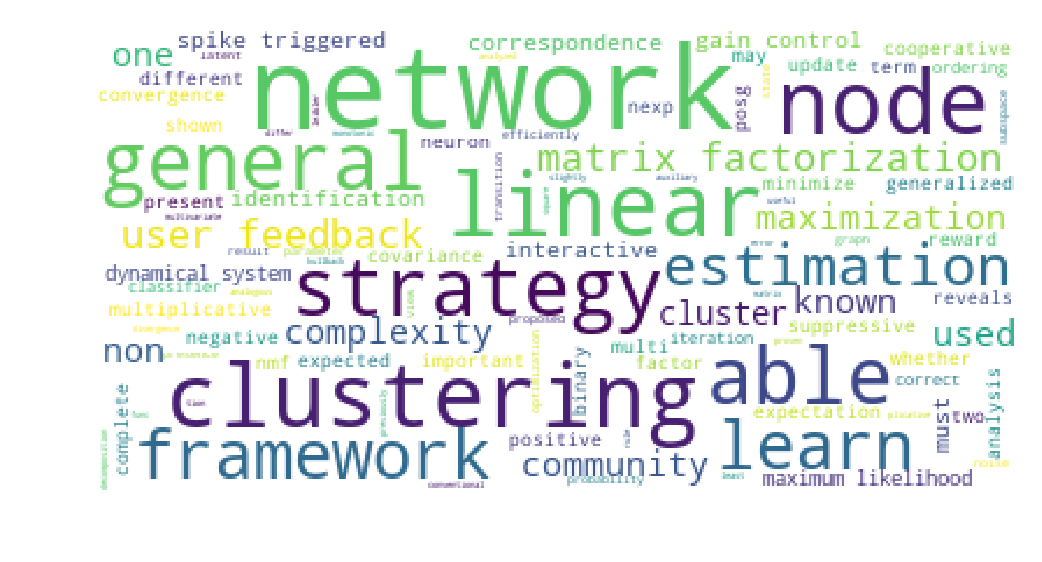

In [20]:
# Data visualization

# Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    max_font_size=50, 
    random_state=42
).generate(str(corpus))

print(wordcloud)

fig = plt.figure(1, dpi=200)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# fig.savefig("word1.png", dpi=900)

In [21]:
# Vectorization

from sklearn.feature_extraction.text import CountVectorizer
import re
cv = CountVectorizer(
    max_df=0.8, # ignore terms that have a document frequency strictly higher 
                # than the given threshold (corpus-specific stop words)
    stop_words=stop_words,
    max_features=10000,  # limit the vocabulary to 10000
    ngram_range=(1,3))  # use ngrams of 1 to 3 tokens
X = cv.fit_transform(corpus)

In [23]:
import numpy as np
np.set_printoptions(threshold=np.inf) # this is so the full array can be displayed

X.toarray()[:3]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [24]:
list(cv.vocabulary_.keys())[:10]

['non',
 'negative',
 'matrix',
 'factorization',
 'nmf',
 'previously',
 'shown',
 'useful',
 'decomposition',
 'multivariate']

In [25]:
# Visualizing top N uni-grams, bi-grams & tri-grams

#Most frequently occuring words
def get_top_n_words(corpus, ngram_range=(1,1), n=None):
    vec = CountVectorizer(
            ngram_range=ngram_range,  
            max_features=2000
            ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

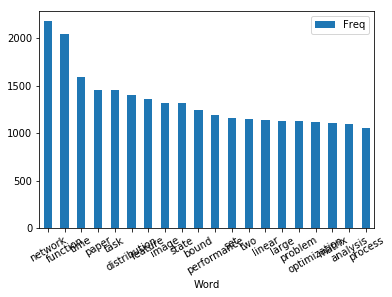

In [26]:
# Convert most freq words to dataframe for plotting bar plot
top_words = pd.DataFrame(get_top_n_words(corpus, n=20), columns=["Word", "Freq"])
top_words.set_index('Word').plot.bar(rot=30)

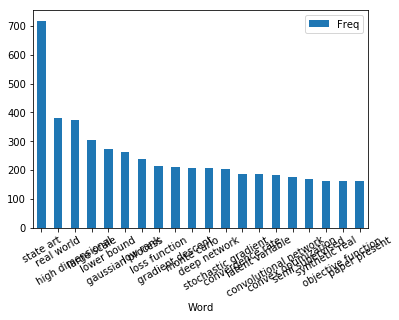

In [27]:
top_words = pd.DataFrame(get_top_n_words(corpus, ngram_range=(2,2), n=20), columns=["Word", "Freq"])
top_words.set_index('Word').plot.bar(rot=30)

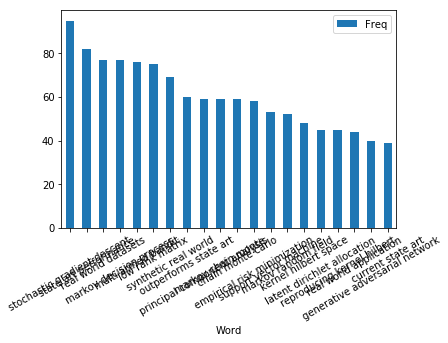

In [28]:
top_words = pd.DataFrame(get_top_n_words(corpus, ngram_range=(3,3), n=20), columns=["Word", "Freq"])
top_words.set_index('Word').plot.bar(rot=30)

In [29]:
# Vectorization / Embedding

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(X)  # X is the output of our CountVectorizer


TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [31]:
#generate tf-idf for a given document

doc = corpus[22]
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [33]:
# tf_idf_vector.toarray()

In [34]:
# More simply, we can use the TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,3), max_df=0.8, max_features=10000)

In [35]:
X = tfidf.fit_transform(corpus)

In [36]:
X.shape

(3924, 10000)

In [37]:
feature_names = np.array(tfidf.get_feature_names())

In [39]:
# Based on the TF-IDF scores, we can extract the words with the highest scores to get the keywords for a document.

def get_top_tf_idf_words(response, top_n=2):
    scores = np.sort(response.data)[:-(top_n+1):-1]
    sorted_nzs = np.argsort(response.data)[:-(top_n+1):-1]
    top_kw = feature_names[response.indices[sorted_nzs]]
    return [f'{str(scores[i])[:10]}: {top_kw[i]}' for i in range(top_n)]


In [40]:
doc_idx = 2
doc = corpus[doc_idx]
Y = tfidf.transform([doc])
print(dataset.loc[doc_idx, 'abstract1'])
get_top_tf_idf_words(Y, top_n=10)

Competition Adds Complexity It is known that determinining whether a DEC-POMDP, namely, a cooperative partially observable stochastic game (POSG), has a cooperative strategy with positive expected reward is complete for NEXP. It was not known until now how cooperation affected that complexity. We show that, for competitive POSGs, the complexity of determining whether one team has a positive-expected-reward strategy is complete for the class NEXP with an oracle for NP.


['0.34704165: expected reward',
 '0.32507444: cooperative',
 '0.25223428: complete',
 '0.24969605: complexity',
 '0.24385827: whether',
 '0.22480212: reward',
 '0.22439679: positive',
 '0.21796216: expected',
 '0.19633052: strategy',
 '0.18881437: dec']